In [42]:
import numpy as np
import math
import matplotlib.pylab as plt
from matplotlib import gridspec
import pandas as pd
import scipy.stats as st
import seaborn as sns


%matplotlib inline

from statsmodels.distributions.empirical_distribution import ECDF

from statsmodels.stats.proportion import binom_test, proportions_ztest, proportions_chisquare

In [7]:
data = pd.read_csv('https://github.com/Intelligent-Systems-Phystech/psad-2020/raw/master/homework_data/sem_2/a.csv' , header=None)

In [14]:
data.head()

,0
0,0.040755
1,-1.651792
2,-2.252079
3,2.569533
4,-0.101837


In [15]:
data.describe()

,0
count,100.000000
mean,-0.181608
std,1.118405
min,-4.471227
25%,-0.844683
50%,-0.194082
75%,0.455849
max,2.569533


# среднее и дисперсия

In [12]:
data.mean()

0   -0.181608
dtype: float64

In [13]:
data.std(ddof=1)

0    1.118405
dtype: float64

In [23]:
dt = data.values

In [26]:
data = dt.flatten()


# нормальность


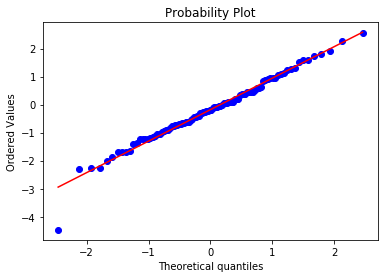

In [27]:
qq_points, qq_line = st.probplot(data, plot=plt)

## критерий Харке-Бера

In [30]:
st.jarque_bera(data)

(8.307585207665896, 0.015704741531727406)

## критерий Шапиро-Уилка

In [29]:
st.shapiro(data)

(0.9819462299346924, 0.18793918192386627)

# бинаризация

In [31]:
binar = []
for a in data:
    if (a < 0 ):
        binar.append(0)
    else:
        binar.append(1)

In [34]:
sum(binar)

42

In [37]:
binom_test(sum(binar) , len(binar) , 0.5 , alternative="two-sided")

0.13321061920721353

In [39]:
def Likelihood(x , p):
    return p**(sum(x))*(1 - p)**(len(x) - sum(x))

In [44]:
p_mle = sum(binar)/len(binar)
p_0 = 0.5

In [45]:
-2*math.log(Likelihood(binar , p_0)/Likelihood(binar , p_mle))

2.57103607355838

In [58]:
st.distributions.chi2(1).pdf(2.57103607355838)

0.0687959054550365